### Converting the Protein Sequence to Molecular Objects

Since we have a dataset of protein sequences along with binary function labels, we need to convert the protein sequences to RDKit molecular objects.

In [1]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\KIIT\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [15]:
pip install torch

                                              0.0/172.3 MB ? eta -:--:--
                                              0.0/172.3 MB ? eta -:--:--
                                              0.0/172.3 MB ? eta -:--:--
                                              0.0/172.3 MB ? eta -:--:--
                                            0.1/172.3 MB 465.5 kB/s eta 0:06:11
                                            0.1/172.3 MB 381.3 kB/s eta 0:07:32
                                            0.1/172.3 MB 502.0 kB/s eta 0:05:44
                                            0.1/172.3 MB 502.0 kB/s eta 0:05:44
                                            0.1/172.3 MB 502.0 kB/s eta 0:05:44
                                            0.2/172.3 MB 446.5 kB/s eta 0:06:26
                                            0.2/172.3 MB 491.5 kB/s eta 0:05:51
                                            0.2/172.3 MB 491.5 kB/s eta 0:05:51
                                            0.3/172.3 MB 506.7 kB/s 


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\KIIT\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [17]:
pip install torch_geometric

Note: you may need to restart the kernel to use updated packages.
                                              0.0/661.6 kB ? eta -:--:--
     --                                    41.0/661.6 kB 991.0 kB/s eta 0:00:01
     ---                                     61.4/661.6 kB 1.1 MB/s eta 0:00:01
     ------                                 112.6/661.6 kB 1.1 MB/s eta 0:00:01
     ---------                              163.8/661.6 kB 1.1 MB/s eta 0:00:01
     ------------                           225.3/661.6 kB 1.1 MB/s eta 0:00:01
     ---------------                        276.5/661.6 kB 1.1 MB/s eta 0:00:01
     ---------------                        276.5/661.6 kB 1.1 MB/s eta 0:00:01
     --------------------                   358.4/661.6 kB 1.1 MB/s eta 0:00:01
     ---------------------                  368.6/661.6 kB 1.0 MB/s eta 0:00:01
     -------------------------              450.6/661.6 kB 1.1 MB/s eta 0:00:01
     -----------------------------          522.2/661.6 kB 1.


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\KIIT\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [18]:
#importing the necessary modules
import csv
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem

import torch
from torch_geometric.data import Data

In [19]:
#reading the protein sequence and function labels from the CSV file
protein_data = []
with open('trainData.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        protein_data.append(row)

We will now convert the protein sequences to graph structures.

In [20]:
graphs = []
for row in protein_data:
    sequence = row[0]  # Assuming protein sequence is in the first column

    # Convert the protein sequence to a list of amino acids
    amino_acids = list(sequence)

    # Create a node feature tensor
    node_features = torch.tensor([[ord(aa)] for aa in amino_acids], dtype=torch.float)

    # Create an edge index tensor
    num_nodes = len(amino_acids)
    edge_index = torch.tensor([(i, i+1) for i in range(num_nodes-1)], dtype=torch.long).t().contiguous()

    # Create a PyG Data object
    data = Data(x=node_features, edge_index=edge_index)

    graphs.append(data)

### Visualization of the Graphs

In [21]:
pip install networkx


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\KIIT\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [22]:
#importing the visualization libraries
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# Convert PyG data to NetworkX graph
graph = nx.Graph()
graph.add_nodes_from(range(num_nodes))
graph.add_edges_from(edge_index.t().tolist())

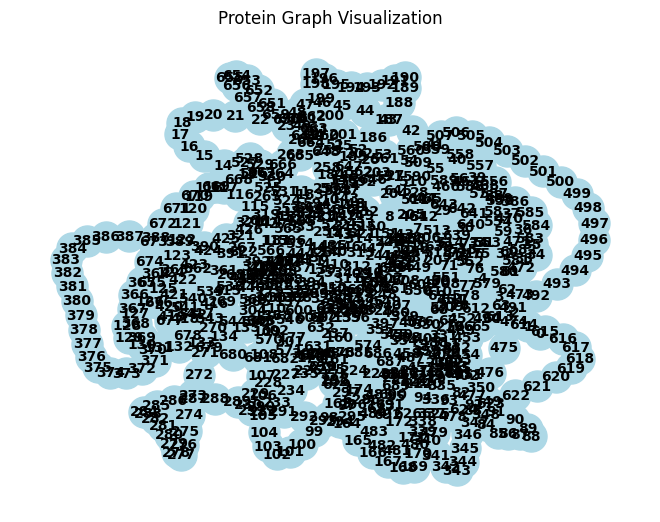

In [24]:
# Visualize the graph
pos = nx.spring_layout(graph)
plt.figure()
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title('Protein Graph Visualization')
plt.show()